# Predicting Fake News
Fake news is false or misleading information presented as news. It often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue. Fake news always reduces the impact of real news by competing with it, and sharing the likeness. <br>

**About the dataset:** <br>
This data set consists of 44000 fake and real news. Our goal is to train our model to accurately predict whether a particular piece of news is real or fake. Fake and real news data are given in two separate datasets, which each dataset consisting of approximately 22000 articles. The dataset can be found [here.]() 

## Table of Contents
1. [Importing modules and the dataset](#1)
2. [Data cleaning / Prepping](#2)
3. [Some Exploratory Data Analysis](#3)
4. [Feature extraction](#4)
5. [Model training](#5)
6. [Conclusion and saving the Pipeline](#6)

<div id='1'></div>

<br>

### **1. Importing modules and the dataset**

In [1]:
# Set up
import numpy as np
import pandas as pd
import pickle

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

# ML Toolkits
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

<br>
Loading the dataset

In [2]:
fake = pd.read_csv('Dataset/Fake.csv')
real = pd.read_csv('Dataset/True.csv')

In [3]:
display(fake.head())

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
display(real.head())

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
display(fake.info())
print('\n')
display(real.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


None

<div id='2'></div>

<br>

### **2. Data Cleaning / Prepping**

<br>
Adding 'fake' and 'real' label columns in the respective datasets.

In [6]:
fake['label'] = 1    # Fake = 1
real['label'] = 0    # Real = 0

<br>
Concatenating fake and real datasets.

In [7]:
data = pd.concat([fake, real], axis = 0)

<br>
Concatenating 'title' and 'text columns together and dropping the title column.

In [8]:
data['text'] = data['title'] + " " + data['text']
data.drop('title', axis = 1, inplace = True)
data.head()

,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",1


Removing URLs from 'date' column and converting the data type to 'datetime'

In [9]:
pattern = 'http'
filter = data['date'].str.contains(pattern)
data = data[~filter]

pattern = 'Jan|Feb|Mar|Apr|May|June|Jul|Aug|Sep|Oct|Nov|Dec'
filter = data['date'].str.contains(pattern)
data = data[filter]

data['date'] = pd.to_datetime(data['date'])

In [10]:
print(data['date'].dtypes)

datetime64[ns]


<br> 
Splitting the dataset into training and test sets.

In [11]:
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [12]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print()
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (32882,)
Shape of y_train:  (32882,)

Shape of X_test:  (10961,)
Shape of y_test:  (10961,)


In [13]:
print("X; ")
display(X.head())
print("\ny: ")
display(y.head())

X; 


0     Donald Trump Sends Out Embarrassing New Year’...
1     Drunk Bragging Trump Staffer Started Russian ...
2     Sheriff David Clarke Becomes An Internet Joke...
3     Trump Is So Obsessed He Even Has Obama’s Name...
4     Pope Francis Just Called Out Donald Trump Dur...
Name: text, dtype: object


y: 


0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

<div id='3'></div>

<br>

### **3. Some Exploratory Data Analysis**

<br> 
Plotting number of news in each subject category.

In [14]:
data_sub = data.groupby('subject')['text'].count()
display(data_sub)

subject
Government News     1405
Middle-east          778
News                9050
US_News              783
left-news           4083
politics            6327
politicsNews       11272
worldnews          10145
Name: text, dtype: int64

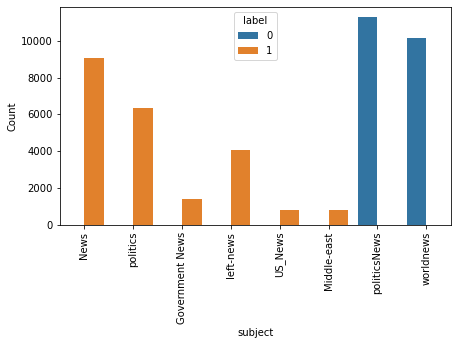

In [15]:
plt.figure(figsize = (7, 4))
ax = sns.countplot(x = 'subject', hue = 'label', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_ylabel('Count')
plt.show()

<br> 
Dynamics of fake news.


In [16]:
data_sub = data.copy()
data_sub['month'] = data_sub['date'].dt.to_period('M')
data_sub['month'] = data_sub['month'].astype(str)

In [17]:
data_sub = data_sub[['month', 'label']]
data_sub = data_sub.dropna()
data_sub = data_sub[data_sub['label'] == 1]
data_sub = data_sub.groupby(['month'])['label'].sum()

In [18]:
display(data_sub.head())

month
2015-03      8
2015-04    326
2015-05    338
2015-07    291
2015-08    220
Name: label, dtype: int64

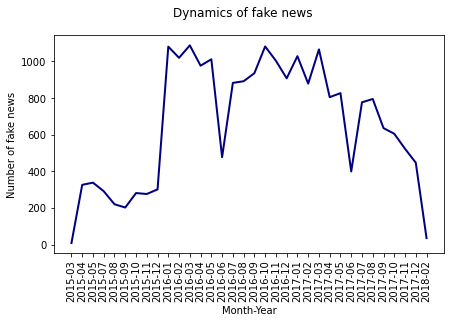

In [19]:
plt.figure(figsize = (7, 4))
plt.plot(data_sub.index, data_sub.values, linewidth = 2, color = 'navy')
plt.suptitle('Dynamics of fake news')
plt.xticks(rotation = 90)
plt.xlabel('Month-Year')
plt.ylabel('Number of fake news')
plt.show()

<div id='4'></div>

<br>

### **4. Feature Extraction**
TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is achieved by multiplying two metrics: 
- Number of times a word appears in a document, and
- The Inverse document frequency of the word across a set of documents.

**1) Term Frequency (TF):** This number simply indicates how often the term is found in documents i.e. frequency. However, TF's alone carry less information regarding the document, as there are words such as 'the', 'is' and 'are' which are a lot more frequent than the words that actually matter, using TF directly will give more weight to these uninformative words. 

**2) Inverse Document Frequency (IDF):** This is where IDF solves the problem. IDF penalizes that occur commonly across different documents which do not add any relevant information. The equation for computing IDF is, 
$$ idf(t) = log \frac{1 + n}{1 + df(t)} + 1. $$

Here, <br>
$n$ represents the total number of documents, <br>
$t$ represents the term in question, <br>
$df(t)$ represents the document frequency of that term; i.e., the number of documents within the set of documents that contain that term. <br>

As one can imagine, for common terms such as "is", "are", etc., $idf(t)$ will most likely be 1, since all documents are highly likely to contain them (thus, $df(t) = n$). On the other hand, the less often a term occurs across different documents, the smaller the denominator will be, making the fraction bigger and in turn, $idf(t)$ bigger.

**3) TF-IDF:** Finally, **tf-idf** is the product of term frequency and inverse-document frequency of a given term (word), which is mathematically computed as, 
$$tf-idf(t,d) = tf(t,d) * idf(t). $$

#### **Why to use TF-IDF in Machine Learning ?**
One of the biggest hurdles that machine learning classification algorithms face is that they generally deal with numbers, and we know that natural language is, well, text. Hence, we need to transform the text into numbers, which is known as **Text Vectorization**. It is a fundamental step in the process of machine learning for analyzing text data. <br>
Calculating TF-IDF and and Text Vectorization can be achieved by using TfidfVectorizer from sklearn.feature_extraction module of scikit-learn.

In [20]:
tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

In [21]:
print("Shape of tfidf_train: ", tfidf_train.shape)
print("Shape of tfidf_test: ", tfidf_test.shape)

Shape of tfidf_train:  (32882, 108050)
Shape of tfidf_test:  (10961, 108050)


<div id='5'></div>

<br>

### **5. Model Training**
Machine learning involves predicting and classifying data and we employ various machine learning algorithms according to the dataset to achieve these predictions. 
To train our model which will classify a given news as 'fake' or 'real' we will train some of the very basic classifying algorithms and will compare the accuracy of the different algorithms.

<br>

#### a) Logistic Regression

In [22]:
label = ['Fake News', 'Real News']

In [23]:
lr = LogisticRegression()
lr.fit(tfidf_train, y_train)

LogisticRegression()

In [24]:
y_pred = lr.predict(tfidf_test)
accuracy_lr = accuracy_score(y_pred, y_test) * 100
f1_lr = f1_score(y_test, y_pred, pos_label=0)
print(f"The accuracy of Logistic Regression model is: {accuracy_lr :.4f}%")
print(f"The F1 score of Logistic Regression model is: {f1_lr :.4f}")

The accuracy of Logistic Regression model is: 98.7227%
The F1 score of Logistic Regression model is: 0.9868


Text(0.5, 1.0, 'Normalized Confusion Matrix for Logistic Regression')

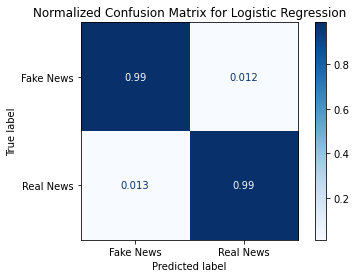

In [25]:
conf_mat_lr = confusion_matrix(y_pred, y_test)
plot = plot_confusion_matrix(lr, tfidf_test, y_test, display_labels=label, cmap=plt.cm.Blues, normalize='pred')
plot.ax_.set_title("Normalized Confusion Matrix for Logistic Regression")

<br> 

#### b) K-Nearest Neighbors

In [26]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(tfidf_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [27]:
y_pred = knn.predict(tfidf_test)
accuracy_knn = accuracy_score(y_pred, y_test) * 100
f1_knn = f1_score(y_test, y_pred, pos_label=0)
print(f"The accuracy of kNN model is: {accuracy_knn :.4f}%")
print(f"The F1 score of kNN Regression model is: {f1_knn :.4f}")

The accuracy of kNN model is: 87.6562%
The F1 score of kNN Regression model is: 0.8791


Text(0.5, 1.0, 'Normalized Confusion Matrix for kNN')

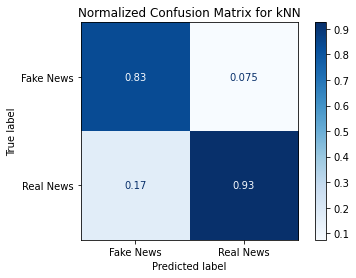

In [28]:
conf_mat_knn = confusion_matrix(y_pred, y_test)
plot = plot_confusion_matrix(knn, tfidf_test, y_test, display_labels=label, cmap=plt.cm.Blues, normalize='pred')
plot.ax_.set_title("Normalized Confusion Matrix for kNN")

<br>

#### c) Support Vector Classification

In [29]:
svc = LinearSVC(max_iter = 100)
svc.fit(tfidf_train, y_train)

LinearSVC(max_iter=100)

In [30]:
y_pred = svc.predict(tfidf_test)
accuracy_svc = accuracy_score(y_pred, y_test) * 100
f1_svc = f1_score(y_test, y_pred, pos_label=0)
print(f"The accuracy of SVC model is: {accuracy_svc :.4f}%")
print(f"The F1 score of SVC model is: {f1_svc :.4f}")

The accuracy of SVC model is: 99.4982%
The F1 score of SVC model is: 0.9948


Text(0.5, 1.0, 'Normalized Confusion Matrix for Support Vector Classifier')

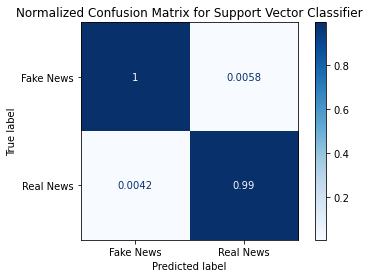

In [31]:
conf_mat_svc = confusion_matrix(y_pred, y_test)
plot = plot_confusion_matrix(svc, tfidf_test, y_test, display_labels=label, cmap=plt.cm.Blues, normalize='pred')
plot.ax_.set_title("Normalized Confusion Matrix for Support Vector Classifier")

<div id='6'></div>

<br>

### **6. Conclusion and Saving the Pipeline**

<br> 

Plotting Accuracy and F1 Scores.

In [32]:
model_names = ['Logistic Regression', 'kNN', 'Support Vector Classifier']

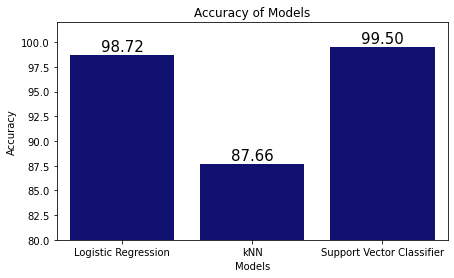

In [33]:
accuracy = [accuracy_lr, accuracy_knn, accuracy_svc]
plt.figure(figsize = (7, 4))
plot = sns.barplot(x = model_names, y = accuracy, color = 'navy')
plt.ylim(80, 102)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title('Accuracy of Models')

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

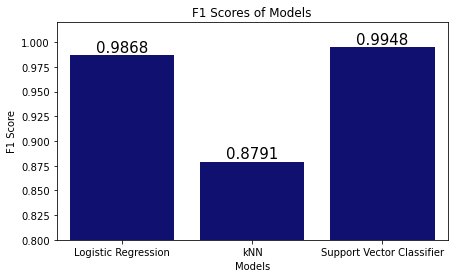

In [34]:
f1 = [f1_lr, f1_knn, f1_svc]
plt.figure(figsize = (7, 4))
plot = sns.barplot(x = model_names, y = f1, color = 'navy')
plt.ylim(0.8, 1.02)
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title('F1 Scores of Models')

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.4f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

<br>

Clearly, the **Support Vector Classifier** has the highest accuracy (~99.5%) and F1 score when predicting whether a news is 'fake' or 'real'. 

#### Pipelining and Saving the model with best accuracy.

In [35]:
svc_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', LinearSVC(max_iter=100))
])
svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC(max_iter=100))])

In [36]:
model_name = 'fake_news_classifier_svc_pipe.sav'
pickle.dump(svc_pipe, open(model_name, 'wb'))